In [25]:
!pip install simpy numpy matplotlib



In [26]:
import simpy
import numpy as np
import random
import matplotlib.pyplot as plt


# Load balancing algorithms


In [27]:
def round_robin(servers, request_id):
    server = servers[request_id % len(servers)]  # Cyclic selection
    return server

def least_loaded(servers, request_id):
    # Choose the server with the least load
    server = min(servers, key=lambda x: x['load'])
    return server

def random_selection(servers, request_id):
    # Random server selection
    return random.choice(servers)

# Request arrival process

In [28]:

def request_arrival(env, servers, algorithm, request_times, processing_times):
    request_id = 0
    while True:
        inter_arrival_time = np.random.exponential(1)  # Poisson distribution
        yield env.timeout(inter_arrival_time)

        # Select server based on the chosen algorithm
        server = algorithm(servers, request_id)

        # Simulate the request processing
        processing_time = np.random.normal(5, 1)  # Normal distribution for processing time
        request_times.append(env.now)  # Log the request arrival time
        processing_times.append(processing_time)  # Log the processing time
        server['load'] += 1  # Increment server load

        # Process the request
        env.process(process_request(env, server, processing_time, request_id))
        request_id += 1


# Request processing (server simulation)

In [29]:

def process_request(env, server, processing_time, request_id):
    yield env.timeout(processing_time)
    server['load'] -= 1  # Decrease load after processing
    server['processing_times'].append(processing_time)


# Run the simulation

Running simulation with round_robin, Arrival Rate: 0.5, Servers: 2
Total Requests: 1016
Server Utilizations: [2.5365789712502704, 2.5470598346464874]
Average Response Times: [np.float64(5.022928655941132), np.float64(5.043682840884139)]
--------------------------------------------------


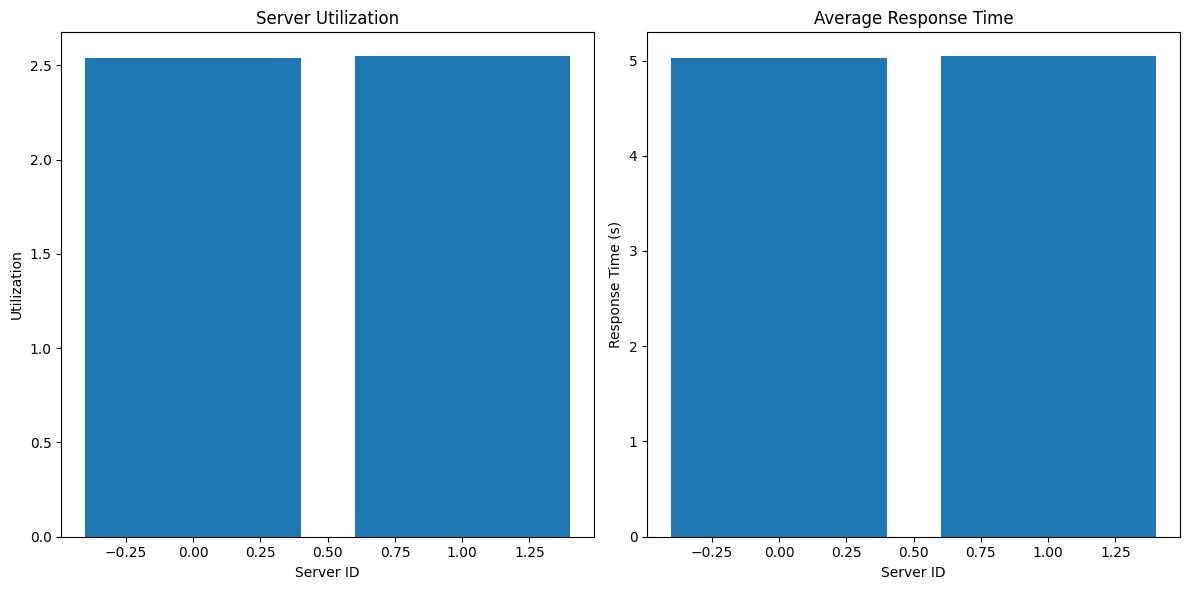

Running simulation with round_robin, Arrival Rate: 0.5, Servers: 4
Total Requests: 970
Server Utilizations: [1.2223462270763688, 1.1994486532152184, 1.2138311547229126, 1.208976075377922]
Average Response Times: [np.float64(5.0510174672577275), np.float64(4.936002688128472), np.float64(5.015831217863276), np.float64(4.995768906520339)]
--------------------------------------------------


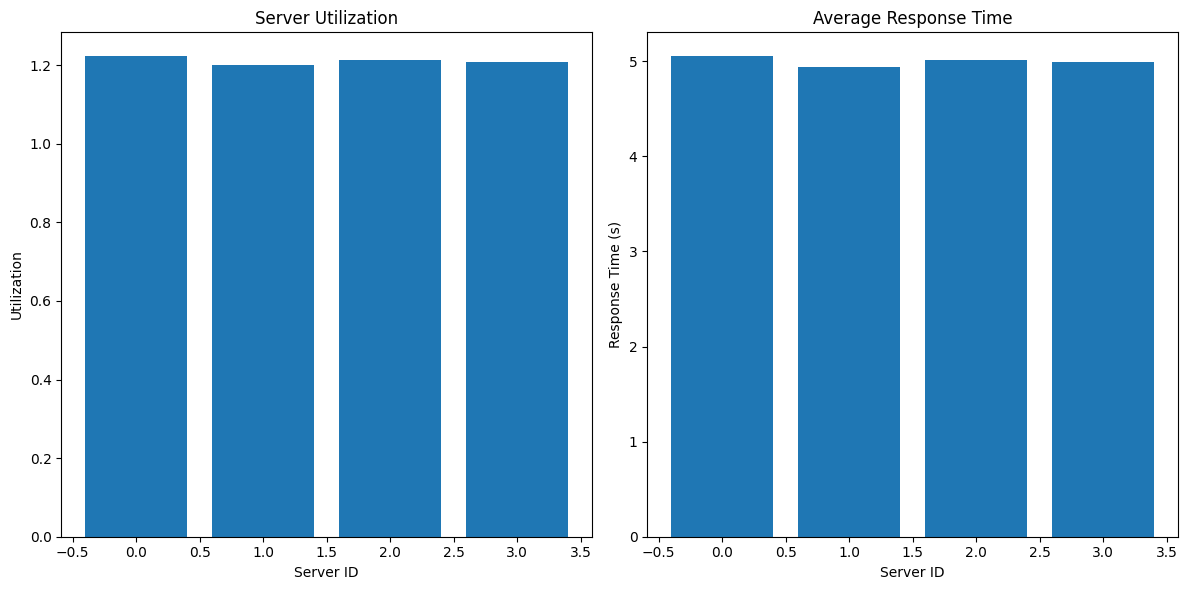

Running simulation with round_robin, Arrival Rate: 0.5, Servers: 6
Total Requests: 994
Server Utilizations: [0.8162667928628964, 0.8349713419885735, 0.811244401645462, 0.8315439446121724, 0.82649111725409, 0.8149268608927254]
Average Response Times: [np.float64(4.9470714718963436), np.float64(5.029947843304662), np.float64(4.887014467743747), np.float64(5.039660270376806), np.float64(5.009037074267211), np.float64(4.969066224955644)]
--------------------------------------------------


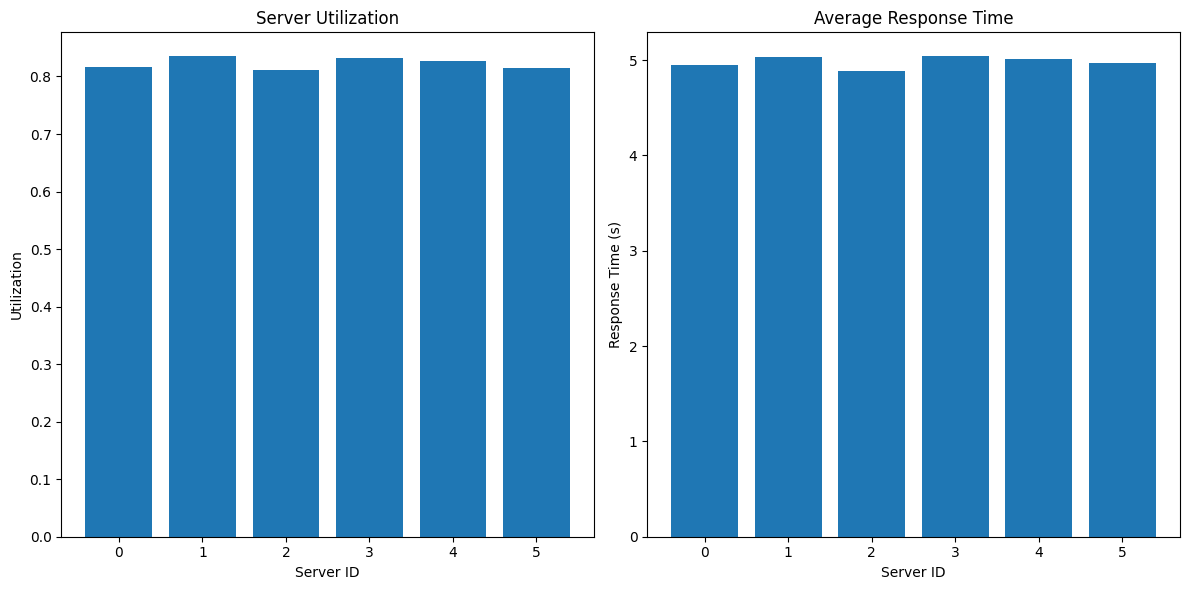

Running simulation with round_robin, Arrival Rate: 1, Servers: 2
Total Requests: 955
Server Utilizations: [2.404022624196741, 2.383150003740331]
Average Response Times: [np.float64(5.050467697892313), np.float64(5.006617654916668)]
--------------------------------------------------


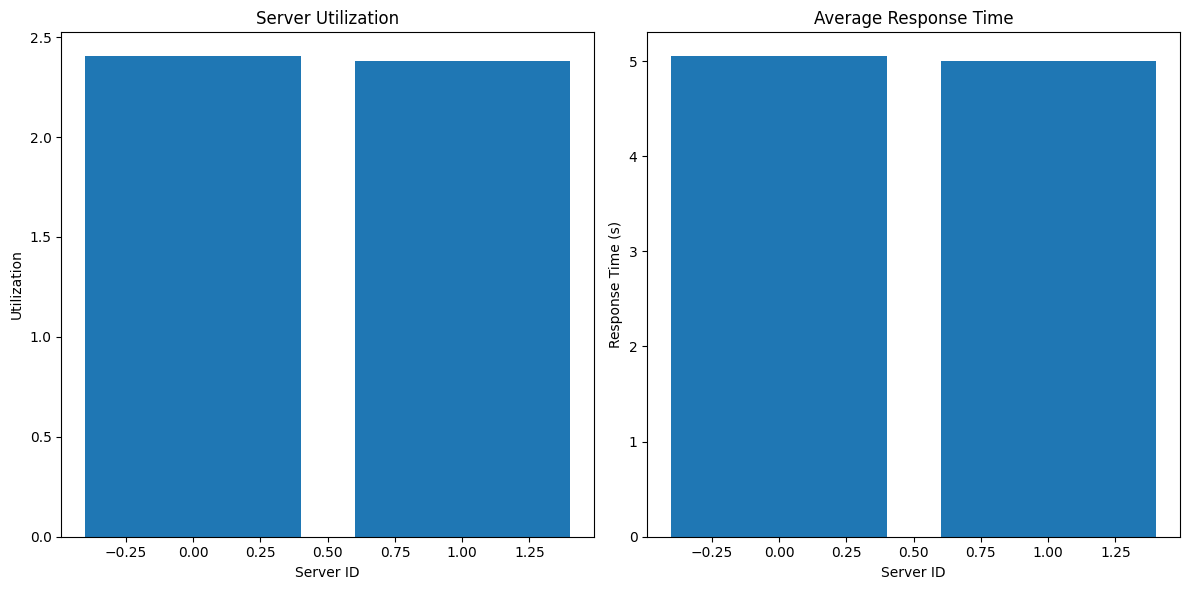

Running simulation with round_robin, Arrival Rate: 1, Servers: 4
Total Requests: 1008
Server Utilizations: [1.286792531046847, 1.2864241081816752, 1.2539394676550855, 1.2427656718082005]
Average Response Times: [np.float64(5.106319567646218), np.float64(5.104857572149504), np.float64(4.995774771534204), np.float64(4.951257656606378)]
--------------------------------------------------


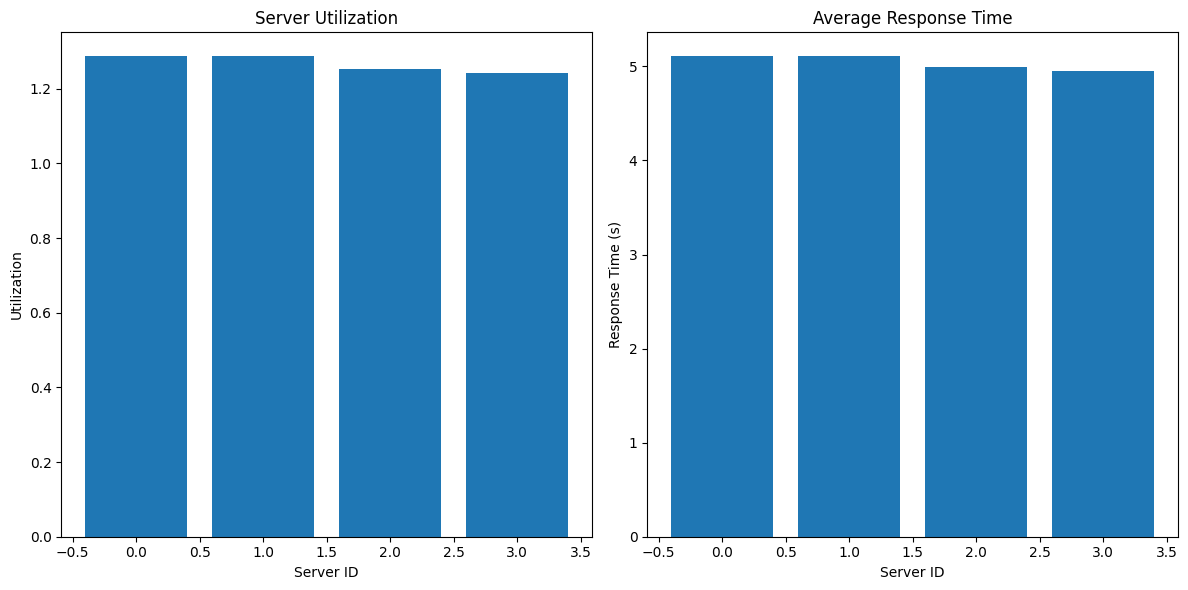

Running simulation with round_robin, Arrival Rate: 1, Servers: 6
Total Requests: 944
Server Utilizations: [0.7951089021271419, 0.791611098627728, 0.773867310340848, 0.7781697684638403, 0.7768018186345632, 0.7842816443745615]
Average Response Times: [np.float64(5.096851936712448), np.float64(5.042108908456865), np.float64(4.960687886800308), np.float64(4.9564953405340155), np.float64(4.979498837401048), np.float64(5.02744643829847)]
--------------------------------------------------


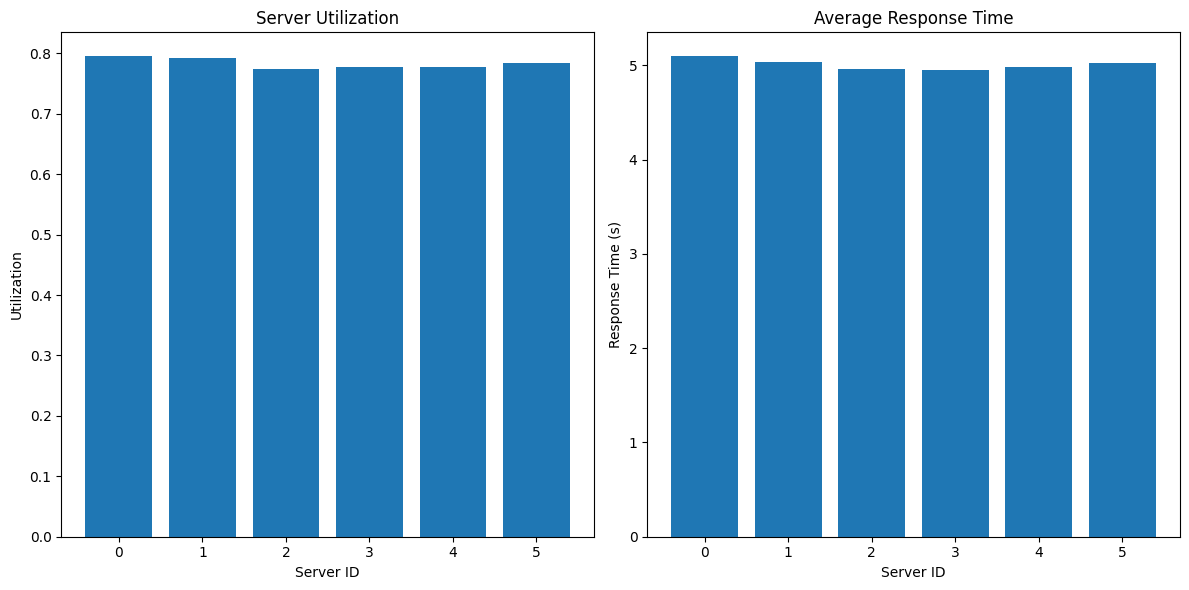

Running simulation with round_robin, Arrival Rate: 2, Servers: 2
Total Requests: 974
Server Utilizations: [2.4236088064065133, 2.403897613964356]
Average Response Times: [np.float64(5.017823615748477), np.float64(4.977013693507985)]
--------------------------------------------------


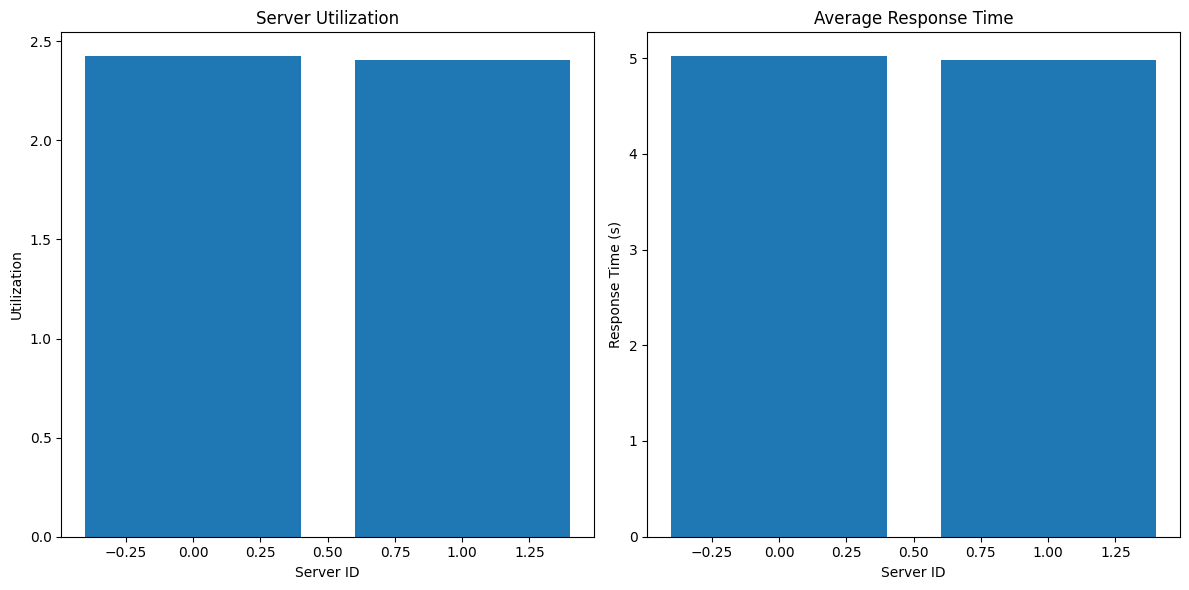

Running simulation with round_robin, Arrival Rate: 2, Servers: 4
Total Requests: 980
Server Utilizations: [1.2364617700324874, 1.2450115338963108, 1.2217196080444992, 1.1941371867988548]
Average Response Times: [np.float64(5.067466270624949), np.float64(5.081679730189024), np.float64(5.007047573952864), np.float64(4.894004863929727)]
--------------------------------------------------


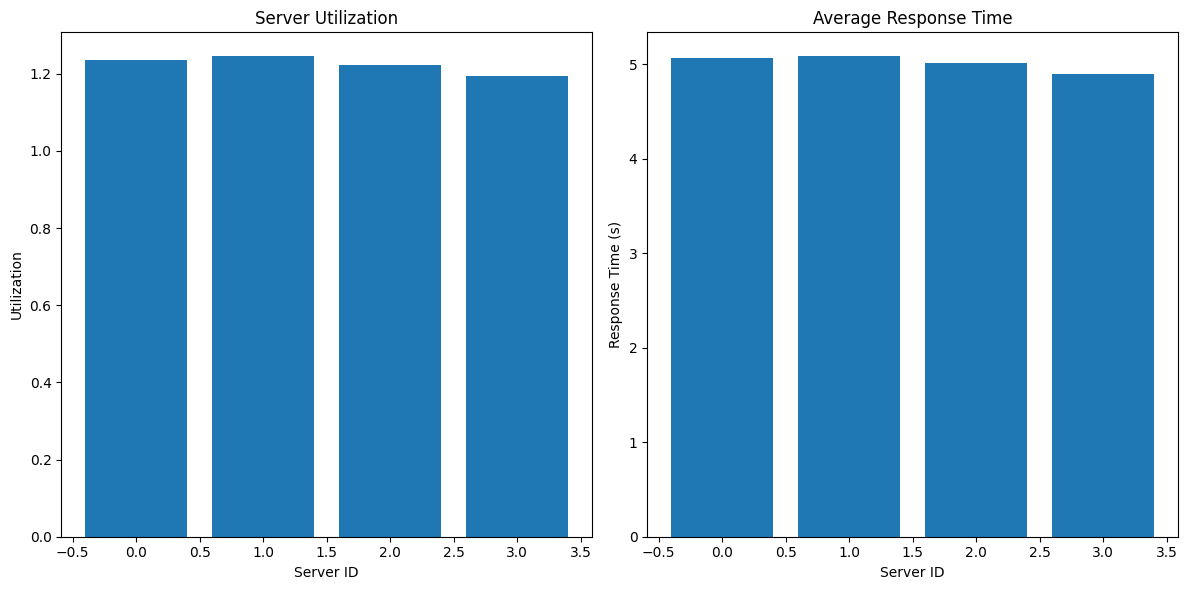

Running simulation with round_robin, Arrival Rate: 2, Servers: 6
Total Requests: 991
Server Utilizations: [0.8181141547909282, 0.8272447330920484, 0.8247326405298983, 0.8310379614817454, 0.8116444094518671, 0.8276073020909588]
Average Response Times: [np.float64(4.9582676047935035), np.float64(5.04417520178078), np.float64(5.028857564206695), np.float64(5.067304643181375), np.float64(4.949051277145535), np.float64(5.077345411600977)]
--------------------------------------------------


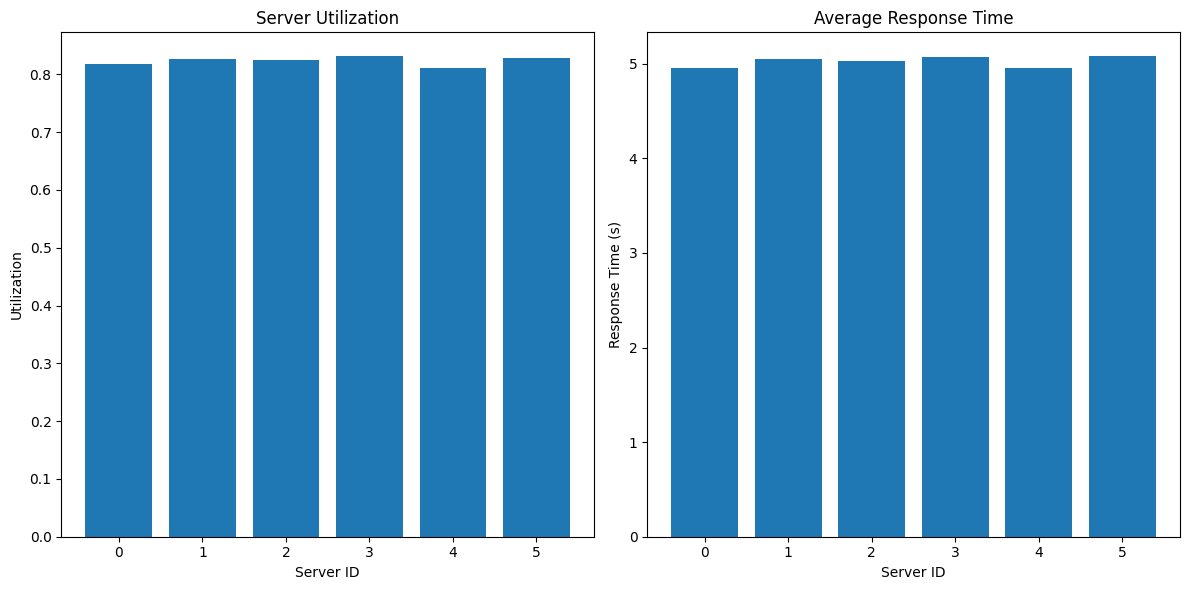

Running simulation with least_loaded, Arrival Rate: 0.5, Servers: 2
Total Requests: 990
Server Utilizations: [2.671875220603352, 2.296513831316339]
Average Response Times: [np.float64(5.031780076465819), np.float64(5.0251943792480045)]
--------------------------------------------------


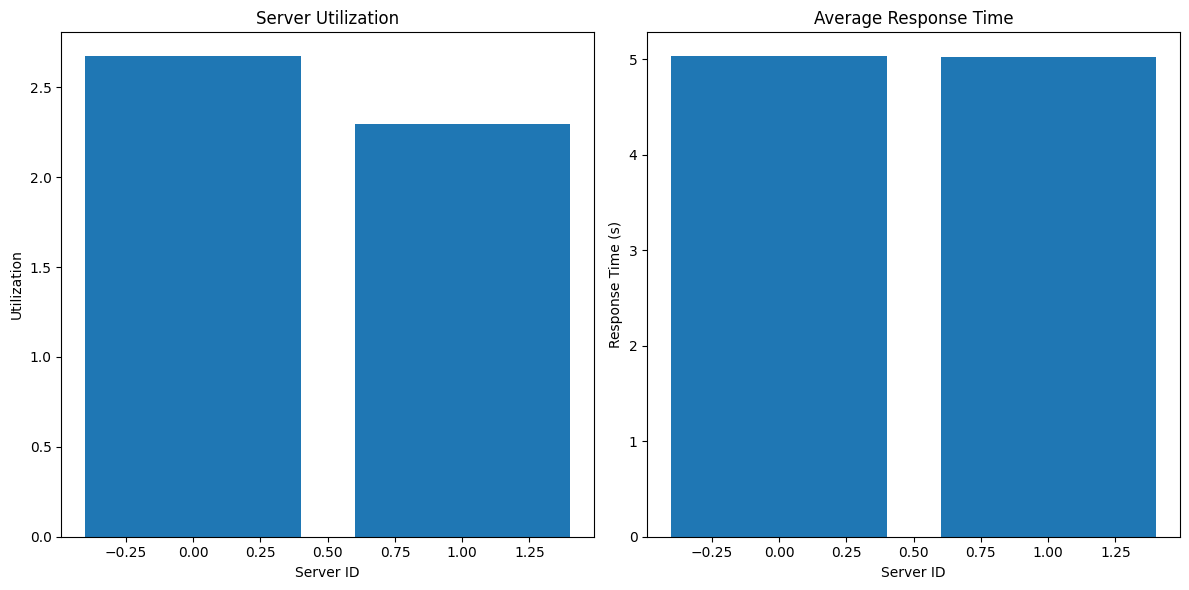

Running simulation with least_loaded, Arrival Rate: 0.5, Servers: 4
Total Requests: 1021
Server Utilizations: [1.5741148143559471, 1.360395670214227, 1.161813691213157, 0.962355601671661]
Average Response Times: [np.float64(5.013104504318301), np.float64(4.928969819616762), np.float64(5.029496498758252), np.float64(4.935156931649541)]
--------------------------------------------------


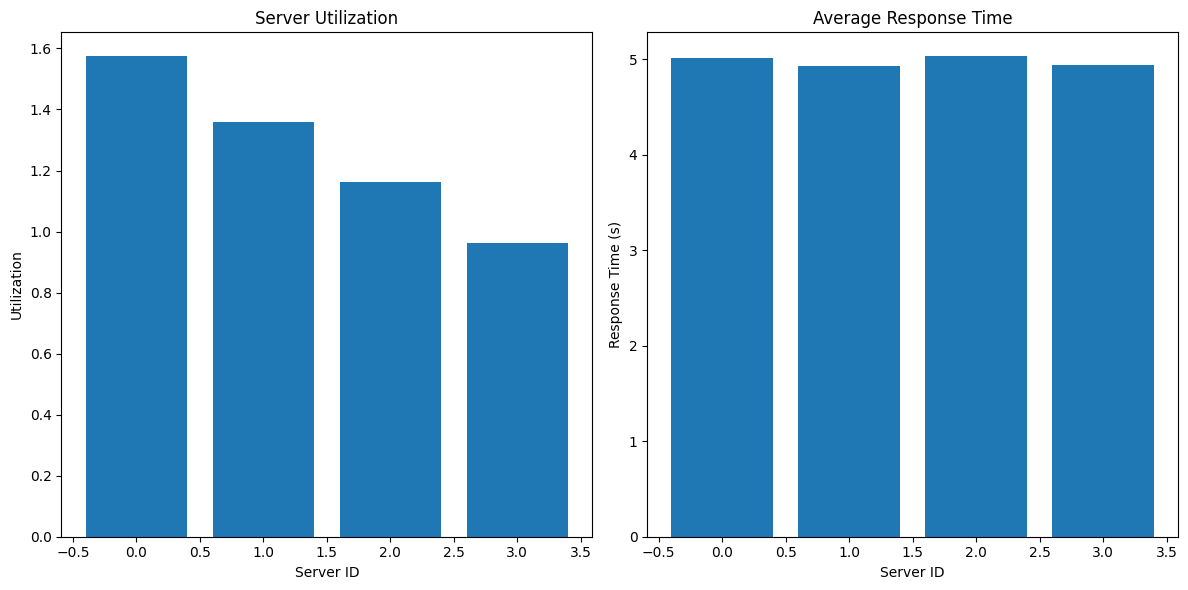

Running simulation with least_loaded, Arrival Rate: 0.5, Servers: 6
Total Requests: 1009
Server Utilizations: [1.1545089298012576, 1.001266825783437, 0.8661219720429665, 0.7607503633738425, 0.6473098962377694, 0.5503323411405712]
Average Response Times: [np.float64(5.063635657023059), np.float64(4.98142699394745), np.float64(4.949268411674093), np.float64(4.908066860476405), np.float64(4.9038628502861314), np.float64(4.913681617326533)]
--------------------------------------------------


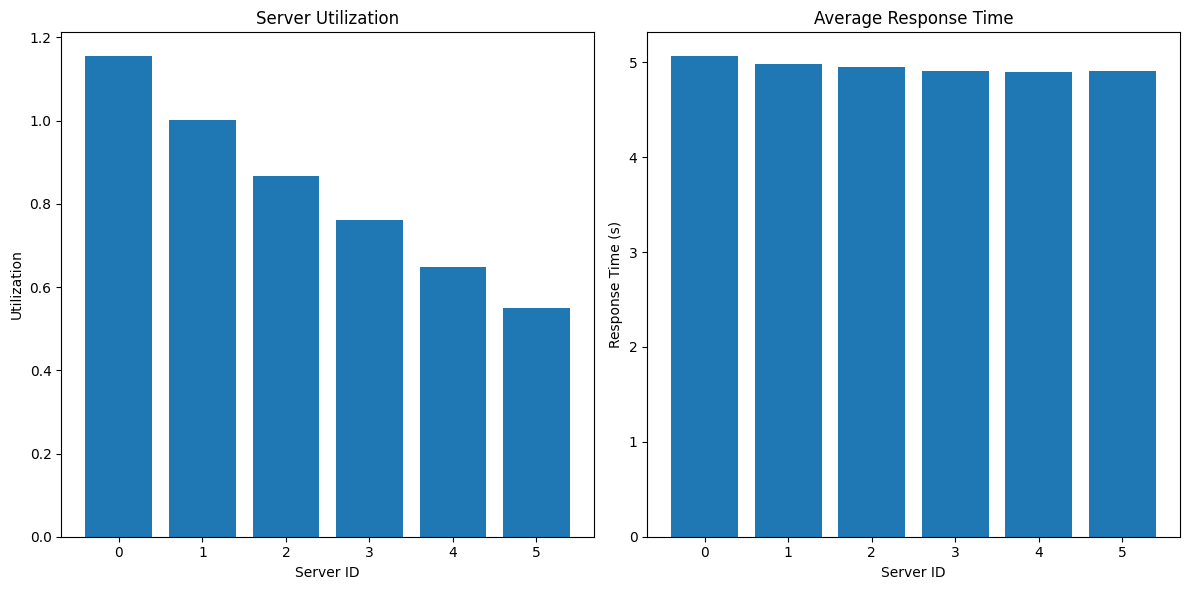

Running simulation with least_loaded, Arrival Rate: 1, Servers: 2
Total Requests: 996
Server Utilizations: [2.6748099860515726, 2.2452060375800738]
Average Response Times: [np.float64(4.925985241347277), np.float64(4.956304718719812)]
--------------------------------------------------


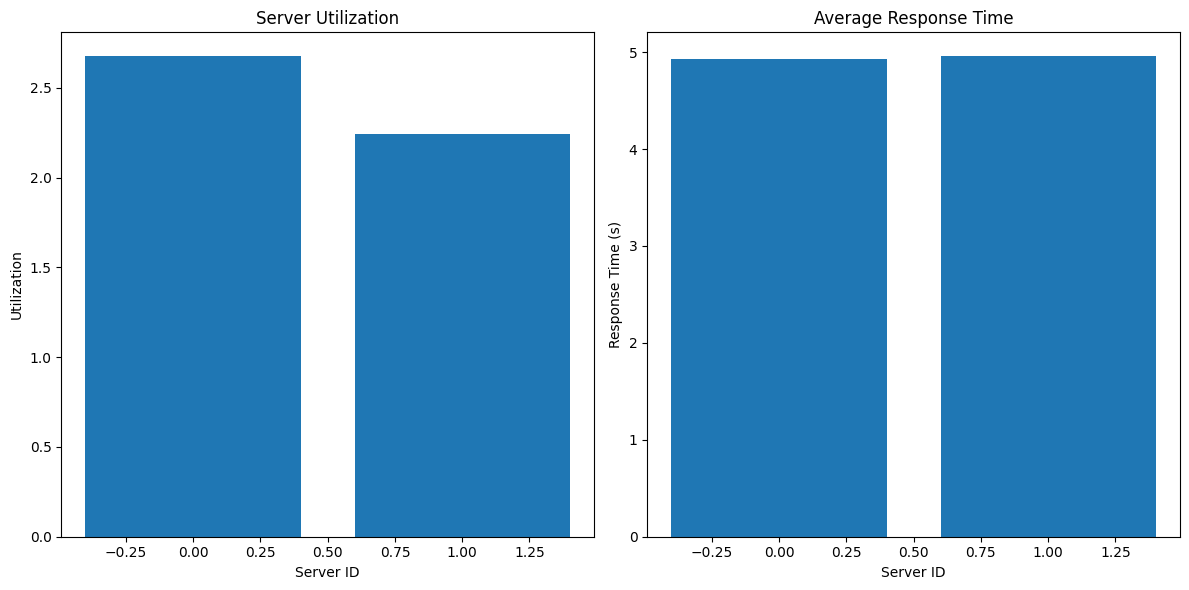

Running simulation with least_loaded, Arrival Rate: 1, Servers: 4
Total Requests: 975
Server Utilizations: [1.5191197832327705, 1.3260998668480057, 1.1142177770191004, 0.9181257650431658]
Average Response Times: [np.float64(5.08066817134706), np.float64(4.966666167970064), np.float64(5.018998995581536), np.float64(5.072518038912521)]
--------------------------------------------------


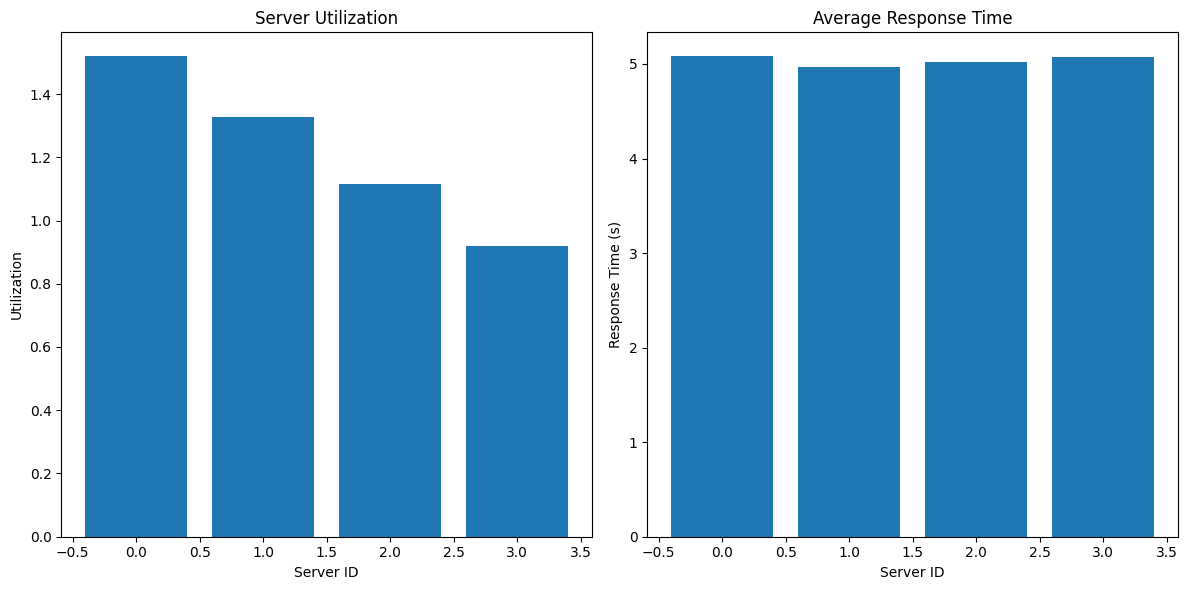

Running simulation with least_loaded, Arrival Rate: 1, Servers: 6
Total Requests: 972
Server Utilizations: [1.163330468864535, 0.9869517698847041, 0.8489373431257824, 0.7394174452649391, 0.6294134608207667, 0.46167734441561875]
Average Response Times: [np.float64(5.0143554692436805), np.float64(5.061291127613864), np.float64(4.878950247849322), np.float64(4.996063819357698), np.float64(4.879174114889665), np.float64(5.246333459268393)]
--------------------------------------------------


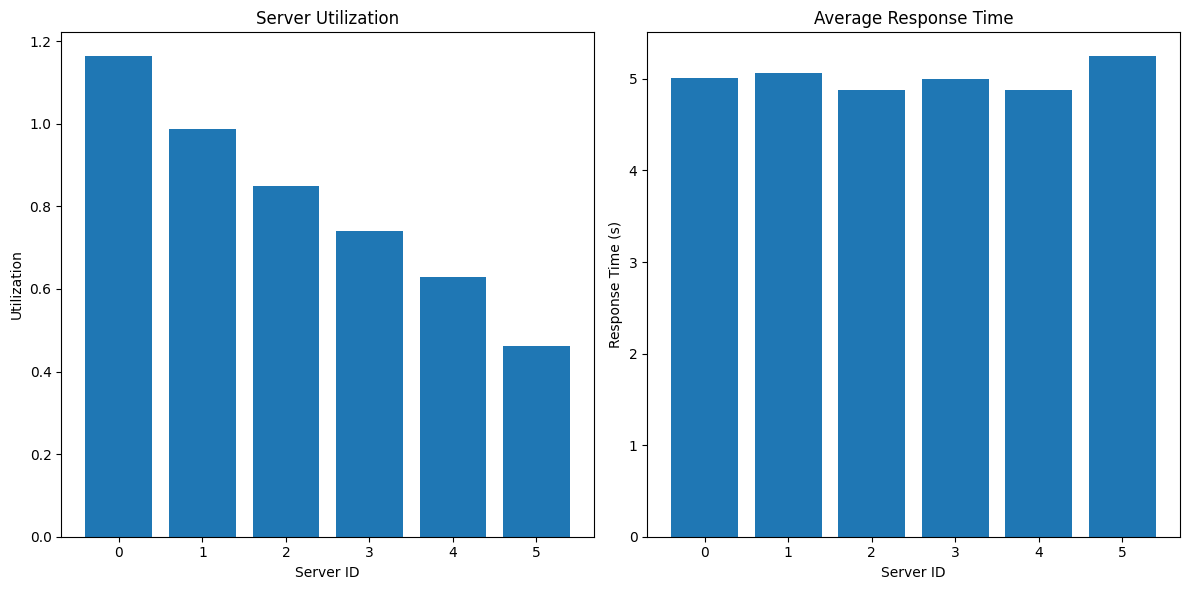

Running simulation with least_loaded, Arrival Rate: 2, Servers: 2
Total Requests: 1012
Server Utilizations: [2.7322072018353643, 2.298640915594045]
Average Response Times: [np.float64(4.985779565392999), np.float64(4.997045468682708)]
--------------------------------------------------


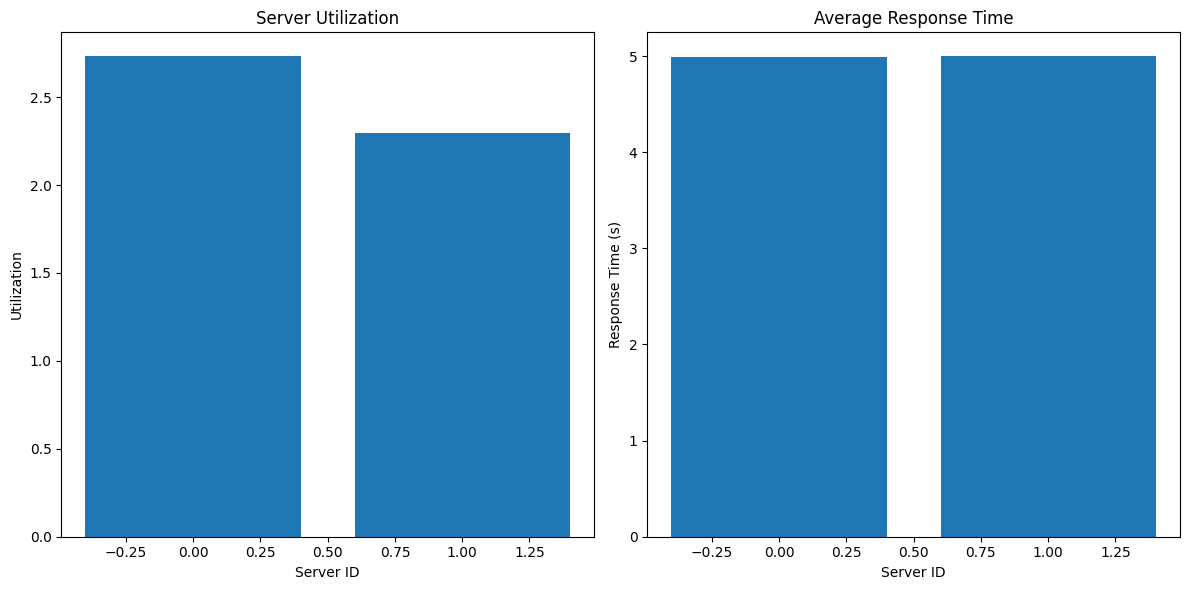

Running simulation with least_loaded, Arrival Rate: 2, Servers: 4
Total Requests: 977
Server Utilizations: [1.4942959801496776, 1.3302548387401965, 1.095414283458319, 0.9380894452150382]
Average Response Times: [np.float64(4.964438472258067), np.float64(5.038844086137108), np.float64(4.956625717005968), np.float64(4.989837474548076)]
--------------------------------------------------


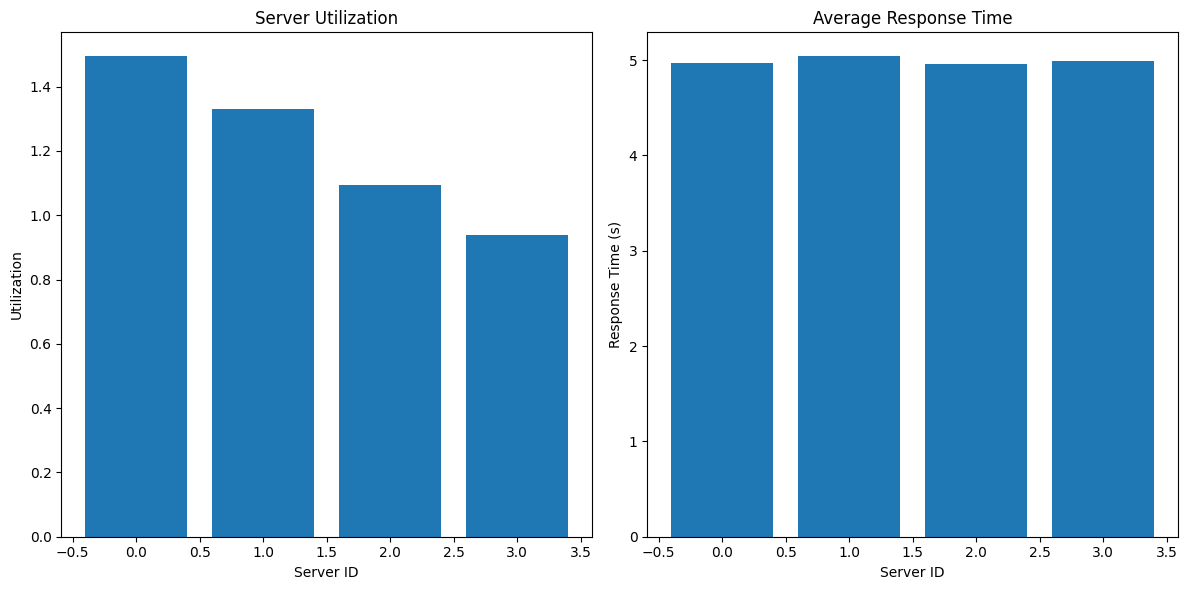

Running simulation with least_loaded, Arrival Rate: 2, Servers: 6
Total Requests: 1002
Server Utilizations: [1.178792923395106, 1.0184584269849777, 0.9038569587131027, 0.7455402729722918, 0.62760059410295, 0.51794944801241]
Average Response Times: [np.float64(5.037576595705582), np.float64(5.0922921349248895), np.float64(4.966247025896167), np.float64(4.904870216922971), np.float64(4.941736961440552), np.float64(5.077935764827551)]
--------------------------------------------------


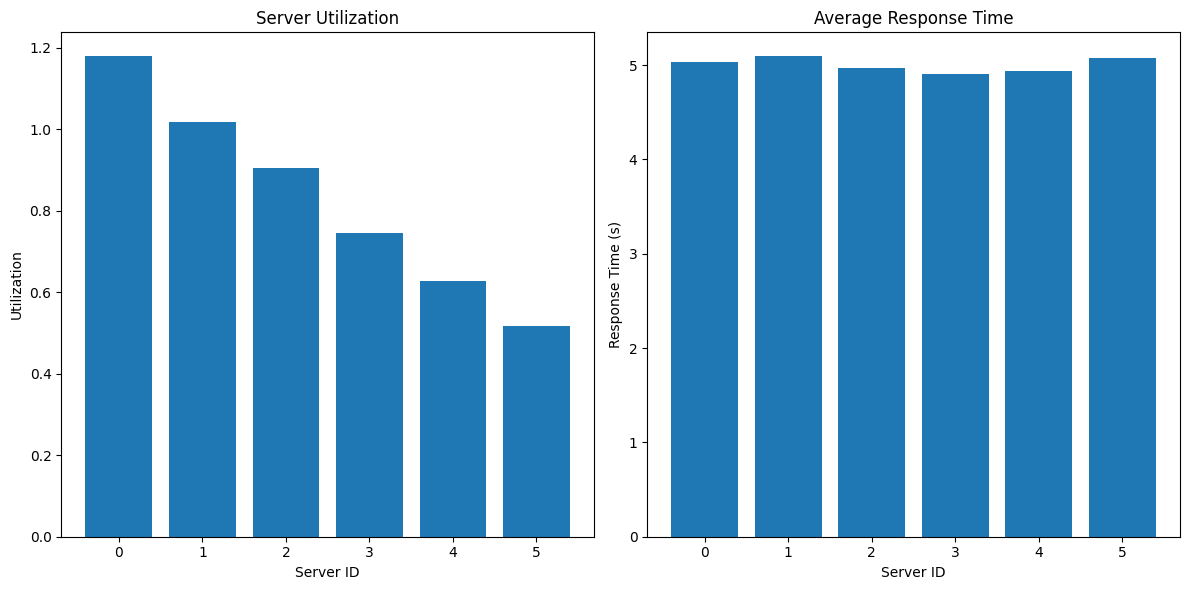

Running simulation with random_selection, Arrival Rate: 0.5, Servers: 2
Total Requests: 1002
Server Utilizations: [2.4261550327741697, 2.594797219332525]
Average Response Times: [np.float64(5.002381510874576), np.float64(5.087837684965738)]
--------------------------------------------------


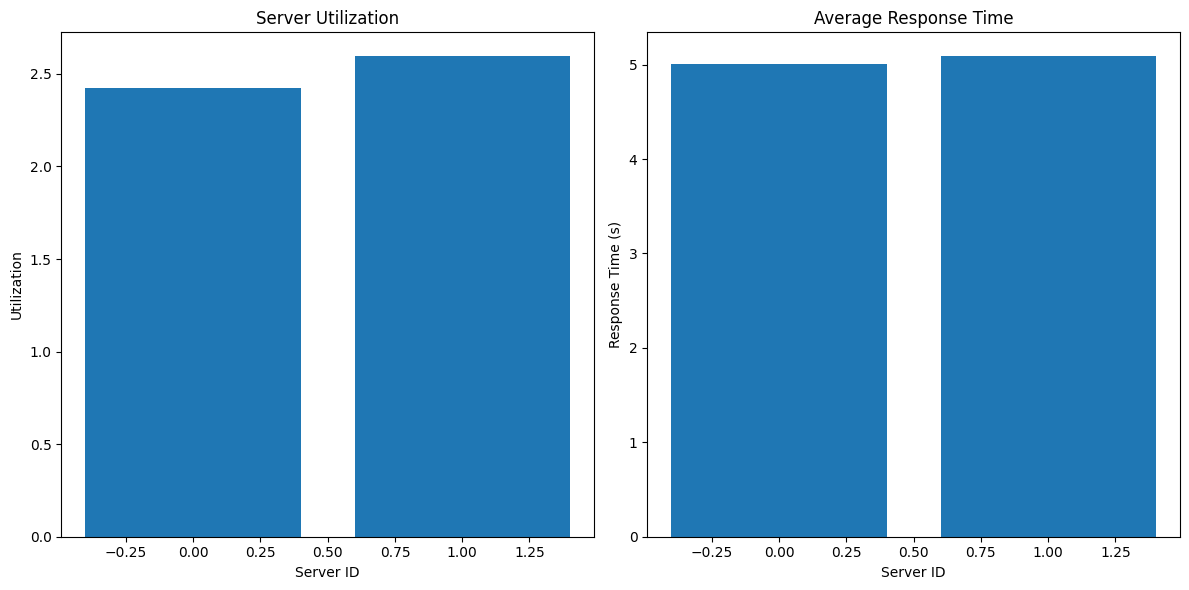

Running simulation with random_selection, Arrival Rate: 0.5, Servers: 4
Total Requests: 1084
Server Utilizations: [1.1613935334961163, 1.423798818395995, 1.3502456257482496, 1.4104984580708335]
Average Response Times: [np.float64(4.963220228615879), np.float64(5.0310912310812546), np.float64(4.92790374360675), np.float64(5.001767581811464)]
--------------------------------------------------


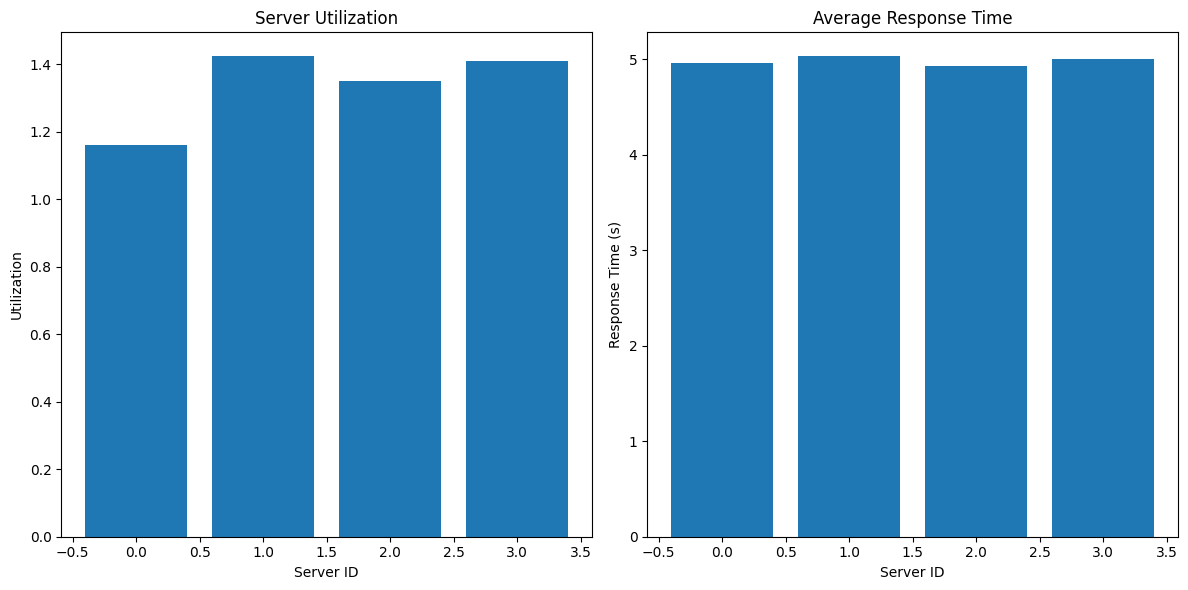

Running simulation with random_selection, Arrival Rate: 0.5, Servers: 6
Total Requests: 986
Server Utilizations: [0.8424774437148264, 0.8335889271463225, 0.7692364887784597, 0.8757659136813147, 0.7424375075801748, 0.835654268729451]
Average Response Times: [np.float64(4.985073631448679), np.float64(5.021620043050136), np.float64(5.060766373542499), np.float64(5.004376649607511), np.float64(4.884457286711674), np.float64(4.974132551961017)]
--------------------------------------------------


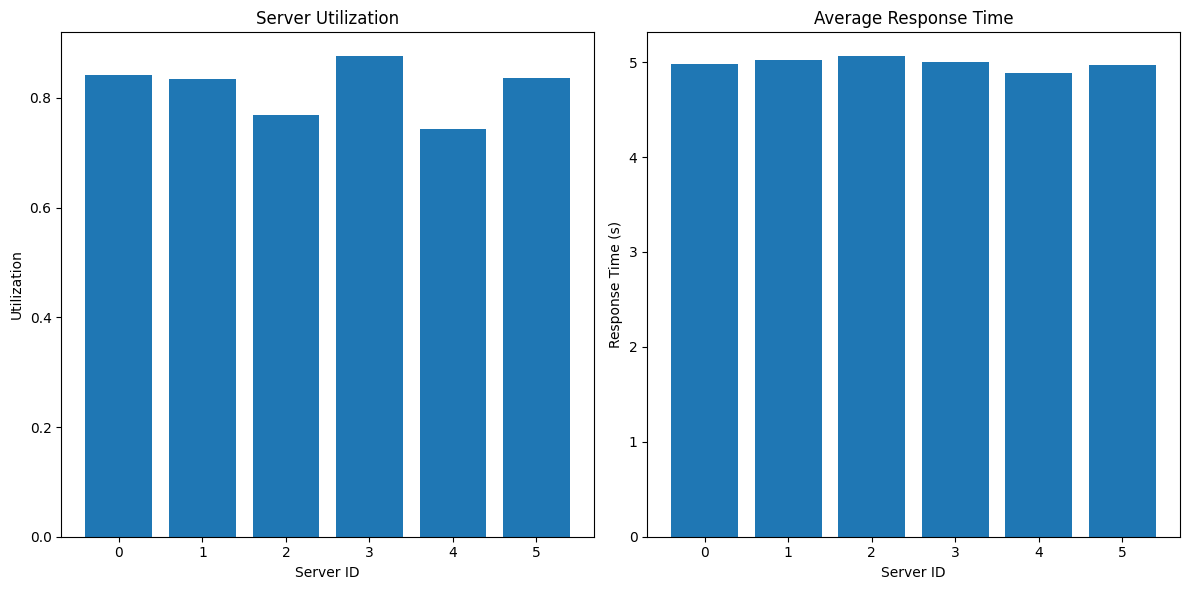

Running simulation with random_selection, Arrival Rate: 1, Servers: 2
Total Requests: 925
Server Utilizations: [2.34369016823715, 2.2685425197438063]
Average Response Times: [np.float64(5.007884974865703), np.float64(4.996789691065654)]
--------------------------------------------------


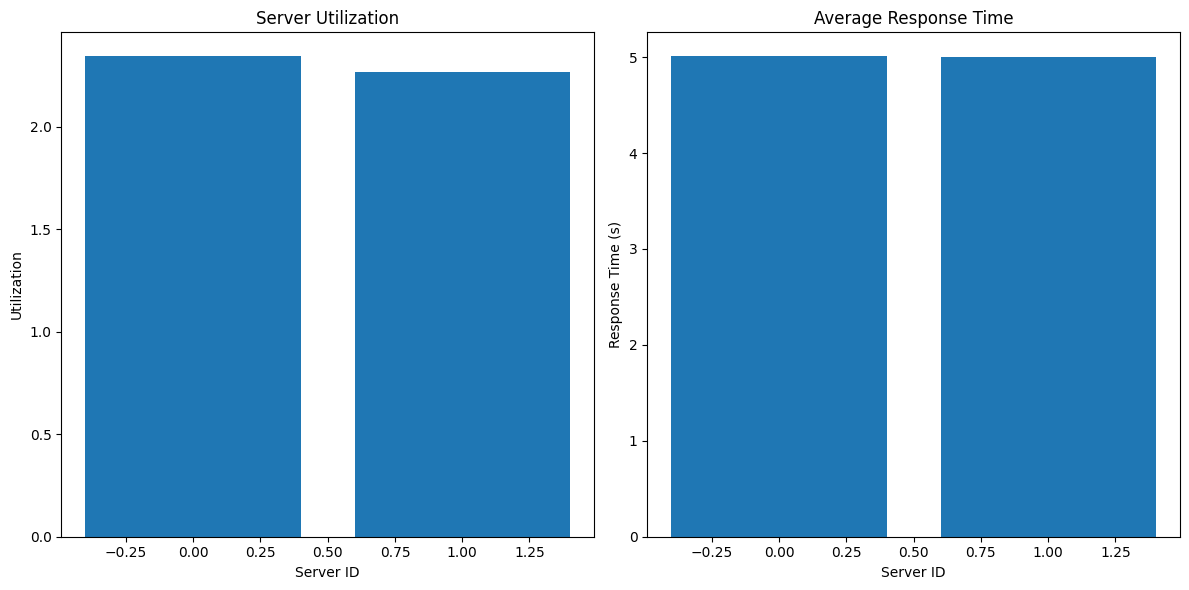

Running simulation with random_selection, Arrival Rate: 1, Servers: 4
Total Requests: 998
Server Utilizations: [1.1898725331481603, 1.1569054660035227, 1.2471326387293094, 1.3734417590077215]
Average Response Times: [np.float64(4.937230428000662), np.float64(5.074146780717204), np.float64(4.96865593119247), np.float64(5.068050771246202)]
--------------------------------------------------


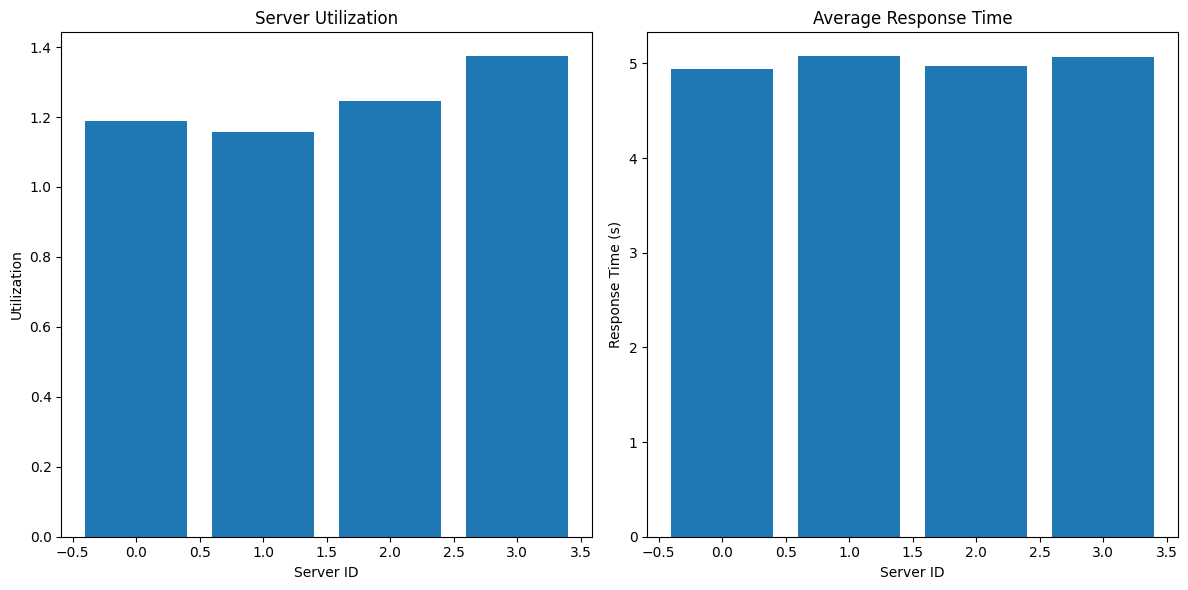

Running simulation with random_selection, Arrival Rate: 1, Servers: 6
Total Requests: 983
Server Utilizations: [0.7717151065717289, 0.8265820744675637, 0.8377497801287971, 0.7189674172297682, 0.883744038568777, 0.8346934824169385]
Average Response Times: [np.float64(5.043889585436135), np.float64(4.8910181921157605), np.float64(5.046685422462631), np.float64(4.9928292863178365), np.float64(4.909689103159873), np.float64(4.968413585815108)]
--------------------------------------------------


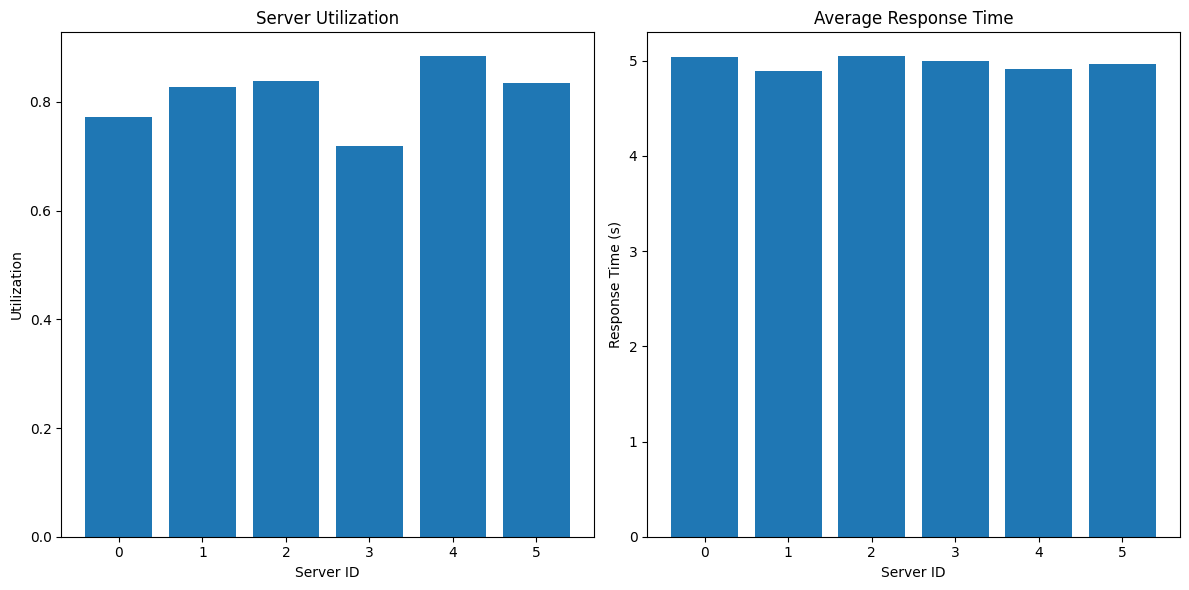

Running simulation with random_selection, Arrival Rate: 2, Servers: 2
Total Requests: 1001
Server Utilizations: [2.513982123749494, 2.48833252426881]
Average Response Times: [np.float64(5.027964247498992), np.float64(5.037110373013783)]
--------------------------------------------------


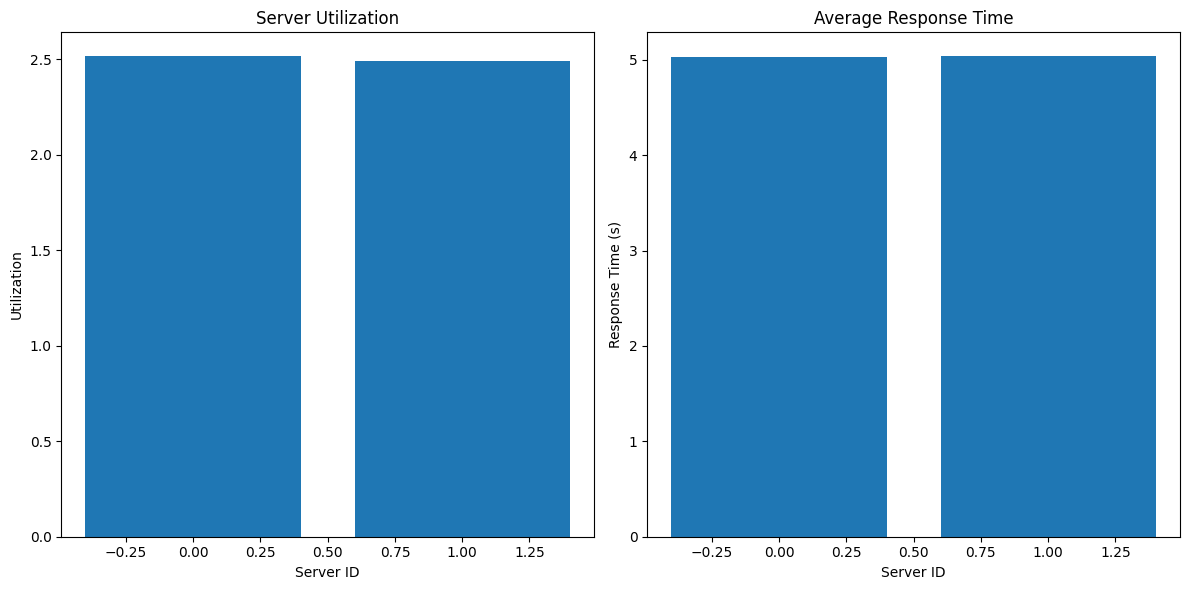

Running simulation with random_selection, Arrival Rate: 2, Servers: 4
Total Requests: 994
Server Utilizations: [1.193208230227772, 1.280399409082042, 1.2413678688641814, 1.2400961937385144]
Average Response Times: [np.float64(4.9925030553463285), np.float64(4.962788407294731), np.float64(5.0055156002587955), np.float64(5.0410414379614386)]
--------------------------------------------------


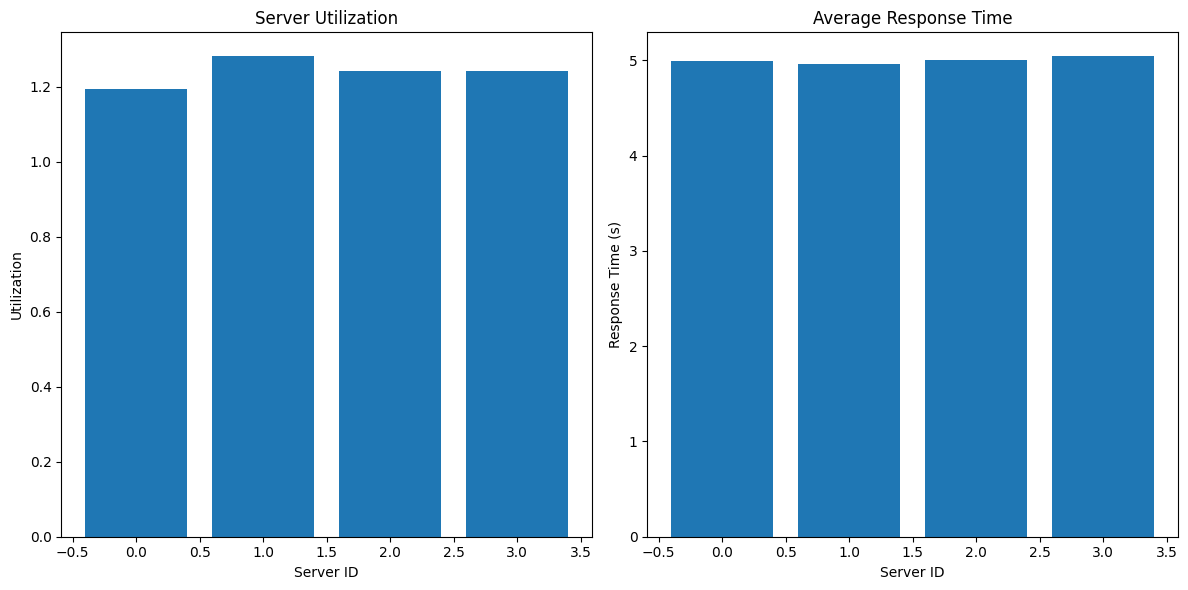

Running simulation with random_selection, Arrival Rate: 2, Servers: 6
Total Requests: 978
Server Utilizations: [0.8801057971478251, 0.8284992378664697, 0.7227143940466572, 0.8983956455994386, 0.8588835121347753, 0.7249861724409418]
Average Response Times: [np.float64(5.0580792939530195), np.float64(5.051824621137009), np.float64(5.018849958657341), np.float64(5.075681613556154), np.float64(5.052255953733975), np.float64(4.999904637523733)]
--------------------------------------------------


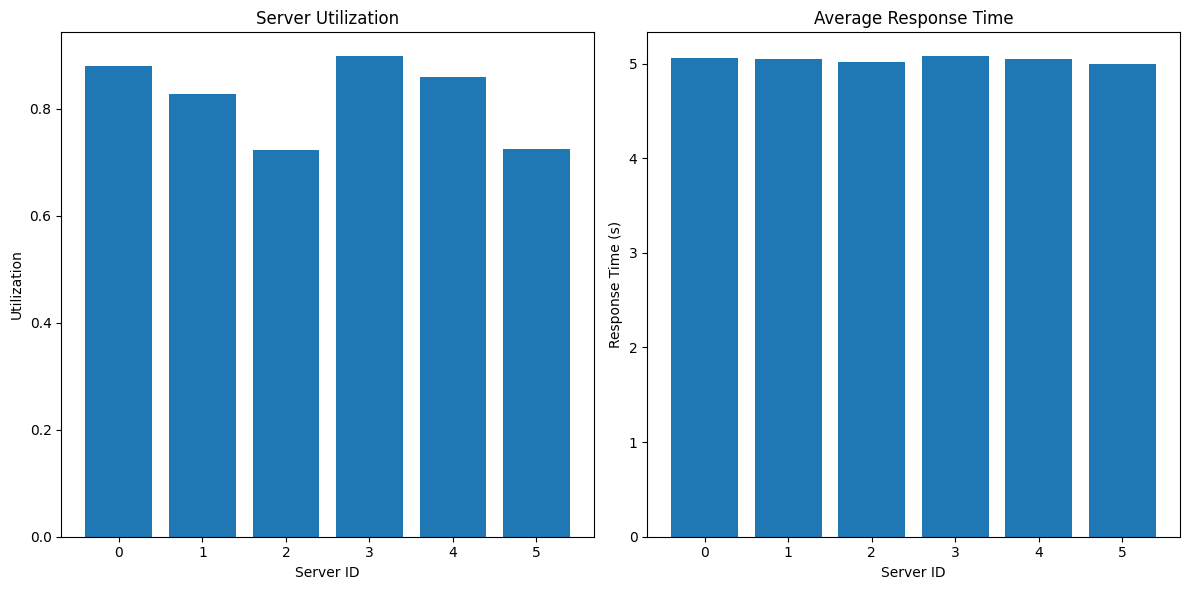

In [30]:

def run_simulation(algorithm, num_servers=4, arrival_rate=1, runtime=1000):
    # Create environment and servers
    env = simpy.Environment()
    servers = [{'id': i, 'load': 0, 'processing_times': []} for i in range(num_servers)]
    
    # Logs for analysis
    request_times = []
    processing_times = []

    # Start the request arrival process
    env.process(request_arrival(env, servers, algorithm, request_times, processing_times))
    
    # Run the simulation
    env.run(until=runtime)

    # Collect statistics
    server_utilizations = [sum(server['processing_times']) / runtime for server in servers]
    avg_response_times = [np.mean(server['processing_times']) for server in servers]
    total_requests = len(request_times)

    return server_utilizations, avg_response_times, total_requests, request_times, processing_times

# Visualization function
def visualize_results(server_utilizations, avg_response_times, request_times, processing_times):
    # Plot server utilization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(server_utilizations)), server_utilizations)
    plt.title('Server Utilization')
    plt.xlabel('Server ID')
    plt.ylabel('Utilization')

    # Plot average response time
    plt.subplot(1, 2, 2)
    plt.bar(range(len(avg_response_times)), avg_response_times)
    plt.title('Average Response Time')
    plt.xlabel('Server ID')
    plt.ylabel('Response Time (s)')
    
    plt.tight_layout()
    plt.show()

# Main experiment loop
def experiment():
    algorithms = [round_robin, least_loaded, random_selection]
    arrival_rates = [0.5, 1, 2]  # Different traffic intensities
    server_counts = [2, 4, 6]  # Different numbers of servers

    for algorithm in algorithms:
        for arrival_rate in arrival_rates:
            for server_count in server_counts:
                print(f"Running simulation with {algorithm.__name__}, Arrival Rate: {arrival_rate}, Servers: {server_count}")
                server_utilizations, avg_response_times, total_requests, request_times, processing_times = run_simulation(algorithm, num_servers=server_count, arrival_rate=arrival_rate)

                # Display results
                print(f"Total Requests: {total_requests}")
                print(f"Server Utilizations: {server_utilizations}")
                print(f"Average Response Times: {avg_response_times}")
                print("-" * 50)

                # Visualize the results
                visualize_results(server_utilizations, avg_response_times, request_times, processing_times)

# Run the experiment
if __name__ == '__main__':
    experiment()
